## Домашнее задание 9

### Задание 1

Сначала импортируем необходимые библиотеки и загружаем данные в удобном формате

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = np.array([79, 80, 80, 80, 74, 80, 80, 79, 64, 78, 73, 78, 74, 45, 81, 48, 80, 82, 82, 70])

a. Находим значения квартилей: 25%, 50% (медиана) и 75%. Для этого в np есть функция percentile.

In [8]:
q25, q50, q75 = np.percentile(data, [25, 50, 75])

print(f"  Q25: {q25}, Медиана (Q50): {q50}, Q75: {q75}\n")

  Q25: 73.75, Медиана (Q50): 79.0, Q75: 80.0



b. Находим межквартиллиный размах - разность значений между 1 и 3 квартилями (Q25 И Q75).

In [9]:
iqr = q75 - q25

print(f"  IQR: {iqr}\n")

  IQR: 6.25



c. Дополнительно к уже имеющимся квартилям находим также максимум и миниимум и выводим получившиеся значения для сравнения. 

In [10]:
minimum = np.min(data)
maximum = np.max(data)

print(f"  Минимум: {minimum}")
print(f"  Q25: {q25}")
print(f"  Медиана: {q50}")
print(f"  Q75: {q75}")
print(f"  Максимум: {maximum}\n")

  Минимум: 45
  Q25: 73.75
  Медиана: 79.0
  Q75: 80.0
  Максимум: 82



d. Видим, что минимальный элемент значительно меньше первого квартиля, так что можно предположить наличие выбросов в данных. Для оценки наличия выбросов, установим верхнюю и нижнюю границы по 1.5 межквартильных размаха от Q25 и Q75 и выделим элементы, которые выходят за этот интервал.

In [ ]:
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Потенциальные выбросы:")
if len(outliers) > 0:
    print(f"{outliers}")
else:
    print("  Выбросы не обнаружены")

Потенциальные выбросы:
[64 45 48]


e. Построим ящик с усами, на котором отображены полученные выше значения. Выбросы изобразим как отдельные точки, усы показывают интервал, в который входят значения, не являющиеся выбросами (определение в соответствии с правилом Тьюки). Медиана - оранжевая линия в ящике, границы ящика - Q25 и Q75.

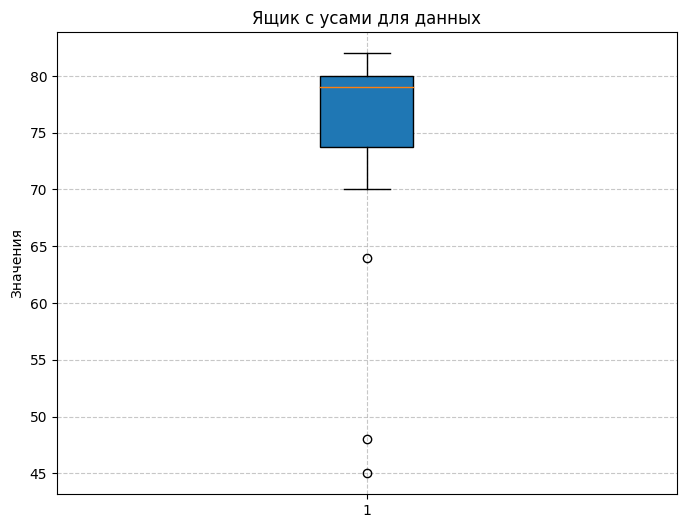

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=True, patch_artist=True)
plt.title("Ящик с усами для данных")
plt.ylabel("Значения")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()